In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/w2w/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# 读取数据
data_hous = load_svmlight_file(f='housing_scale')

In [3]:
# 分割数据
x_train, x_test, y_train, y_test = train_test_split(data_hous[0], data_hous[1], test_size=0.4, random_state=0)

In [4]:
class LinearRegression(object):
    '''
    Parameters:
    ----------
        turns_ : max iteration numbers
        learning_rate_ : learning rate
        silence_ : print process or not
        plot_ : plot or not
        
    Attribute:
    ----------
        w_ : array, shape (n_features, ), [w1, w2, ..., wn]
        b_ : w0, bias
        
    Data format:
    ----------
        y : m*1
        x : m*n
        w : n*1
        b : 1*1 
    '''
    def __init__(self, turns = 50, learning_rate = 0.01, silence = False, plot = True):
        self.turns_ = turns
        self.learning_rate_ = learning_rate
        self.silence_ = silence
        self.plot_ = plot = plot
        
    def calc_error(self, X, y, w, b):
        '''
            error = MSE
        '''
        y_ = X.dot(w) + b
        error = np.sum((y_ - y)**2)
        return error/float(X.shape[0])
        
    
    def gradient(self, X, y, w, b):
        '''
            y_ = Xw + b
            g_w = (2/N)*XT*(y_-y)
            g_b = (2/N)*(y_-y)
        '''
        N = X.shape[0]
        y_ = X.dot(w) + b
        g_w = (2/float(N))*X.T*(y_ - y)
        g_b = (2/float(N))*np.sum(y_-y)
        w1 = w - self.learning_rate_*g_w
        b1 = b - self.learning_rate_*g_b
        return w1, b1
    
    def fit(self, X_train, y_train, X_test, y_test):
        '''
            Gradient descent
        '''
        n_features = X_train.shape[1]
        n_targets = 1
        self.w_ = np.zeros([n_features])
        self.b_ = 0
        train_MSE_list = []
        test_MSE_list = []
        for i in range(self.turns_):
            if self.silence_ == False:
                print('Turn %d'%i)
                print('w:', self.w_)
                print('b:', self.b_)
                print('Train MSE:', self.calc_error(X_train, y_train, self.w_, self.b_))
                print('Test MSE:', self.calc_error(X_test, y_test, self.w_, self.b_))
                print('---------------------------')
                train_MSE_list.append(self.calc_error(X_train, y_train, self.w_, self.b_))
                test_MSE_list.append(self.calc_error(X_test, y_test, self.w_, self.b_))
            self.w_, self.b_ = self.gradient(X_train, y_train, self.w_, self.b_)
        print('Iteration End')
        print('w:', self.w_)
        print('b:', self.b_)
        print('Train MSE:', self.calc_error(X_train, y_train, self.w_, self.b_))
        print('Test MSE:', self.calc_error(X_test, y_test, self.w_, self.b_))
        print('---------------------------')
        if self.silence_ == False:
            fig1, = plt.plot(range(self.turns_), train_MSE_list)
            fig2, = plt.plot(range(self.turns_), test_MSE_list)
            plt.xlabel('Iteration')
            plt.ylabel('MSE')
            plt.legend(handles=[fig1,fig2], labels=['train_loss','validate_loss'], loc='best')
            plt.title('Linear Regression')
            plt.show()
        

Turn 0
w: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
b: 0
Train MSE: 602.842112211
Test MSE: 576.183152709
---------------------------
Turn 1
w: [-0.43375453 -0.30902337 -0.1469461  -0.37828383 -0.17283891  0.05854024
  0.1247332  -0.2204363  -0.17848523 -0.13542741  0.06515735  0.39801522
 -0.23883869]
b: 0.454930693069
Train MSE: 505.527380555
Test MSE: 482.66215041
---------------------------
Turn 2
w: [-0.82631233 -0.58501142 -0.28187185 -0.71745959 -0.33049681  0.114215
  0.2349341  -0.4190308  -0.33983958 -0.25889817  0.12047246  0.75790166
 -0.45819824]
b: 0.866351832663
Train MSE: 426.129422244
Test MSE: 406.451157733
---------------------------
Turn 3
w: [-1.18168771 -0.83124586 -0.40588848 -1.02136186 -0.47440228  0.16728119
  0.3320915  -0.59796011 -0.48566174 -0.3715078   0.1669503   1.08336212
 -0.65993597]
b: 1.23851846804
Train MSE: 361.326470229
Test MSE: 344.333804339
---------------------------
Turn 4
w: [-1.5035032  -1.05068628 -0.52000065 -1.29345055 -0.6

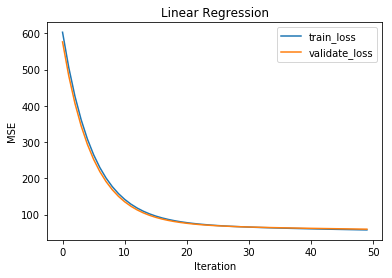

In [5]:
clf = LinearRegression(turns = 50, learning_rate = 0.01)
clf.fit(x_train, y_train, x_test, y_test)